In [ ]:
from koinapy import Koina
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path
from functools import reduce

# Alternative way if __file__ is not defined in Jupyter notebooks
project_root = Path.cwd().parent

sys.path.append(str(project_root))

print(f"Project root added to sys.path: {project_root}")

from make_predictions.intensity_predictions import obtain_predictions_pairs
from seq_utils.fasta_to_peptides import create_tryptic_peptides
from seq_utils.peptide import remove_non_il, switch_first_il
from metrics.get_metrics import metrics_comparison

Project root added to sys.path: c:\Users\robbi\OneDrive\Documents\GitHub\spectral_similarity


In [4]:
# Specify the path to your FASTA file
fasta_file = "../fasta/UP000005640_9606.fasta"

# Generate tryptic peptides
peptides = create_tryptic_peptides(fasta_file)

# Remove non-I/L amino acids
peptides = remove_non_il(peptides)

# Create correct, switched pairs
peptides_switched = np.array([switch_first_il(peptide) for peptide in peptides])
peptides = np.array(peptides)

In [ ]:
peptides_switch_predictions = obtain_predictions_pairs(peptides_switched[0:2000], switched=False)
peptides_predictions = obtain_predictions_pairs(peptides[0:2000], switched=True)

UniSpec::   0%|          | 0/2 [00:00<?, ?it/s]

UniSpec::   0%|          | 0/2 [00:00<?, ?it/s]

In [12]:
score_df = metrics_comparison(
    peptides_predictions, 
    peptides_switch_predictions
)

score_df_randomized = metrics_comparison(
    peptides_predictions, 
    peptides_switch_predictions, 
    randomize_gaussian=True, 
    noise_std_dev=0.1,
)

score_df_randomized_swap = metrics_comparison(
    peptides_predictions,
    peptides_switch_predictions,
    randomize_switched=True,
    num_randomizations=10,
)

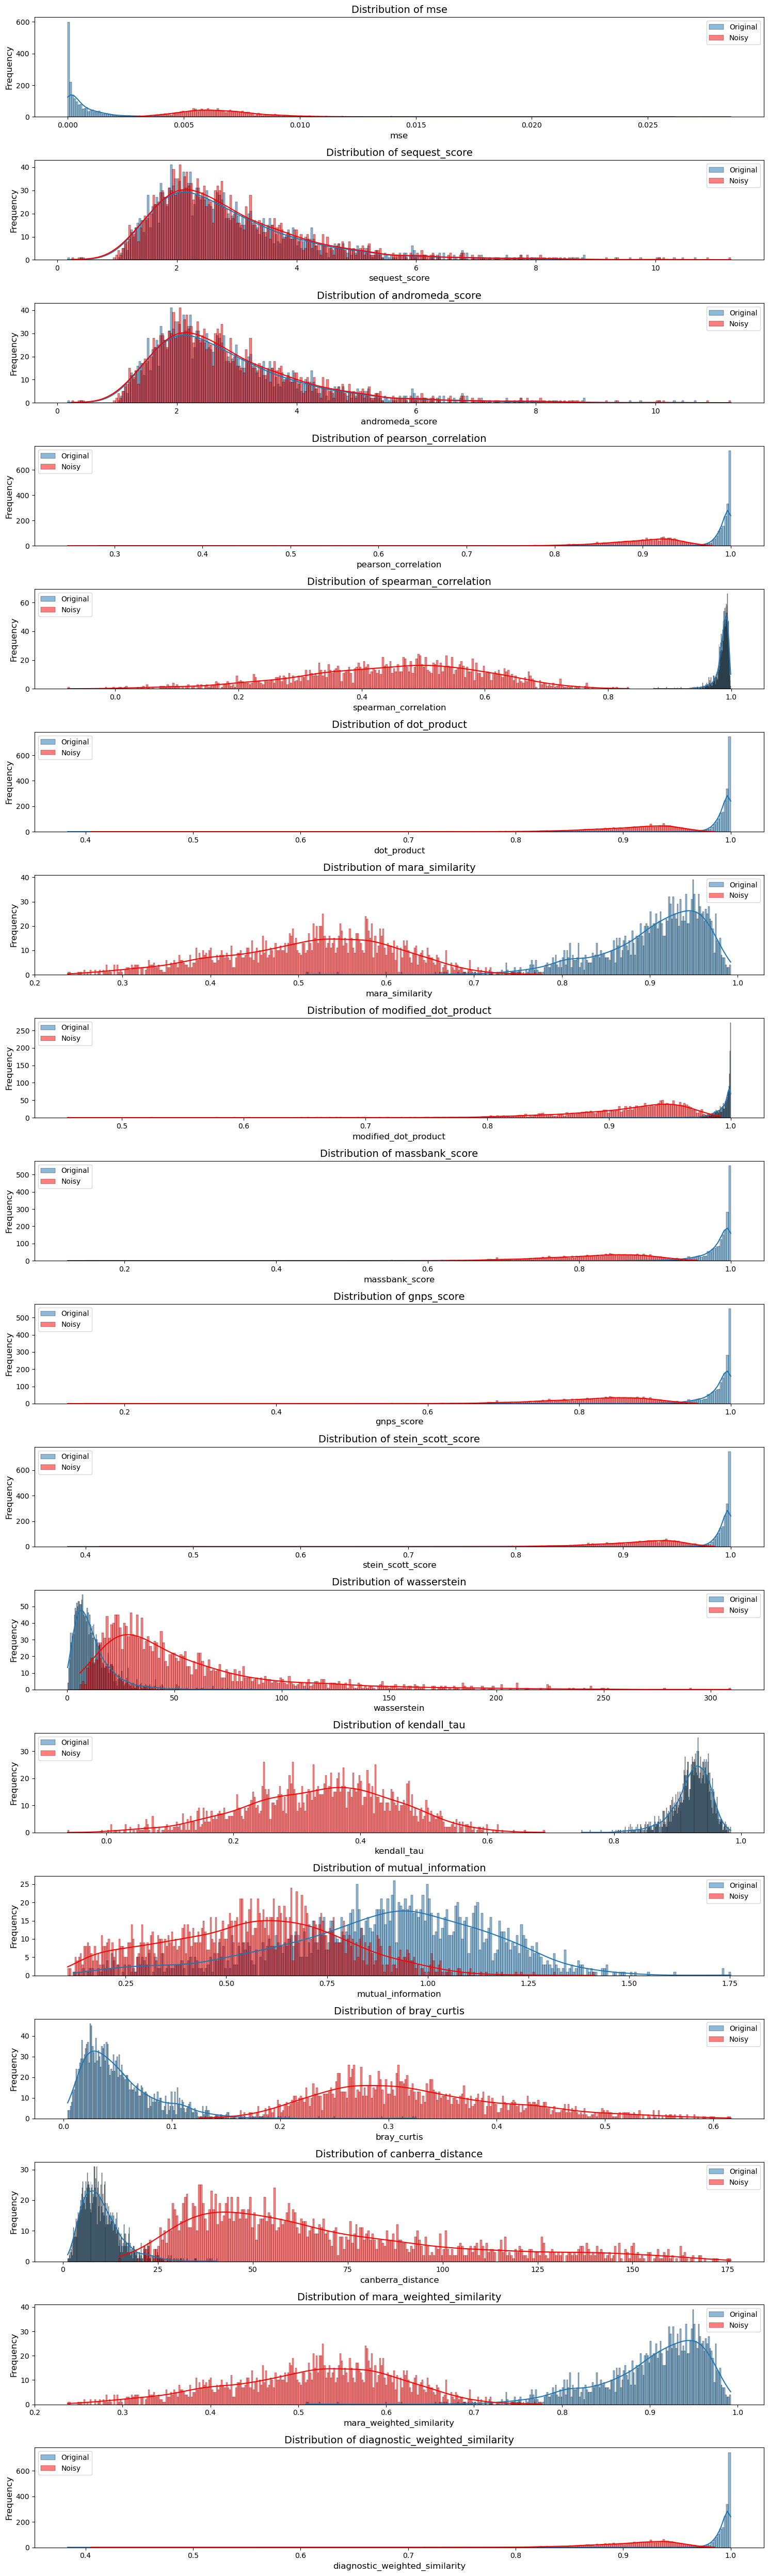

In [13]:
# Generate the distributions for each score as histograms
score_columns = score_df.columns

# Set plot size and style
plt.figure(figsize=(15, 50))
for idx, col in enumerate(score_columns, 1):
    plt.subplot(len(score_columns), 1, idx)
    sns.histplot(score_df[col], bins=300, kde=True, label="Original")
    sns.histplot(score_df_randomized[col], bins=300, kde=True, color="red", label="Noisy")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.legend()
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

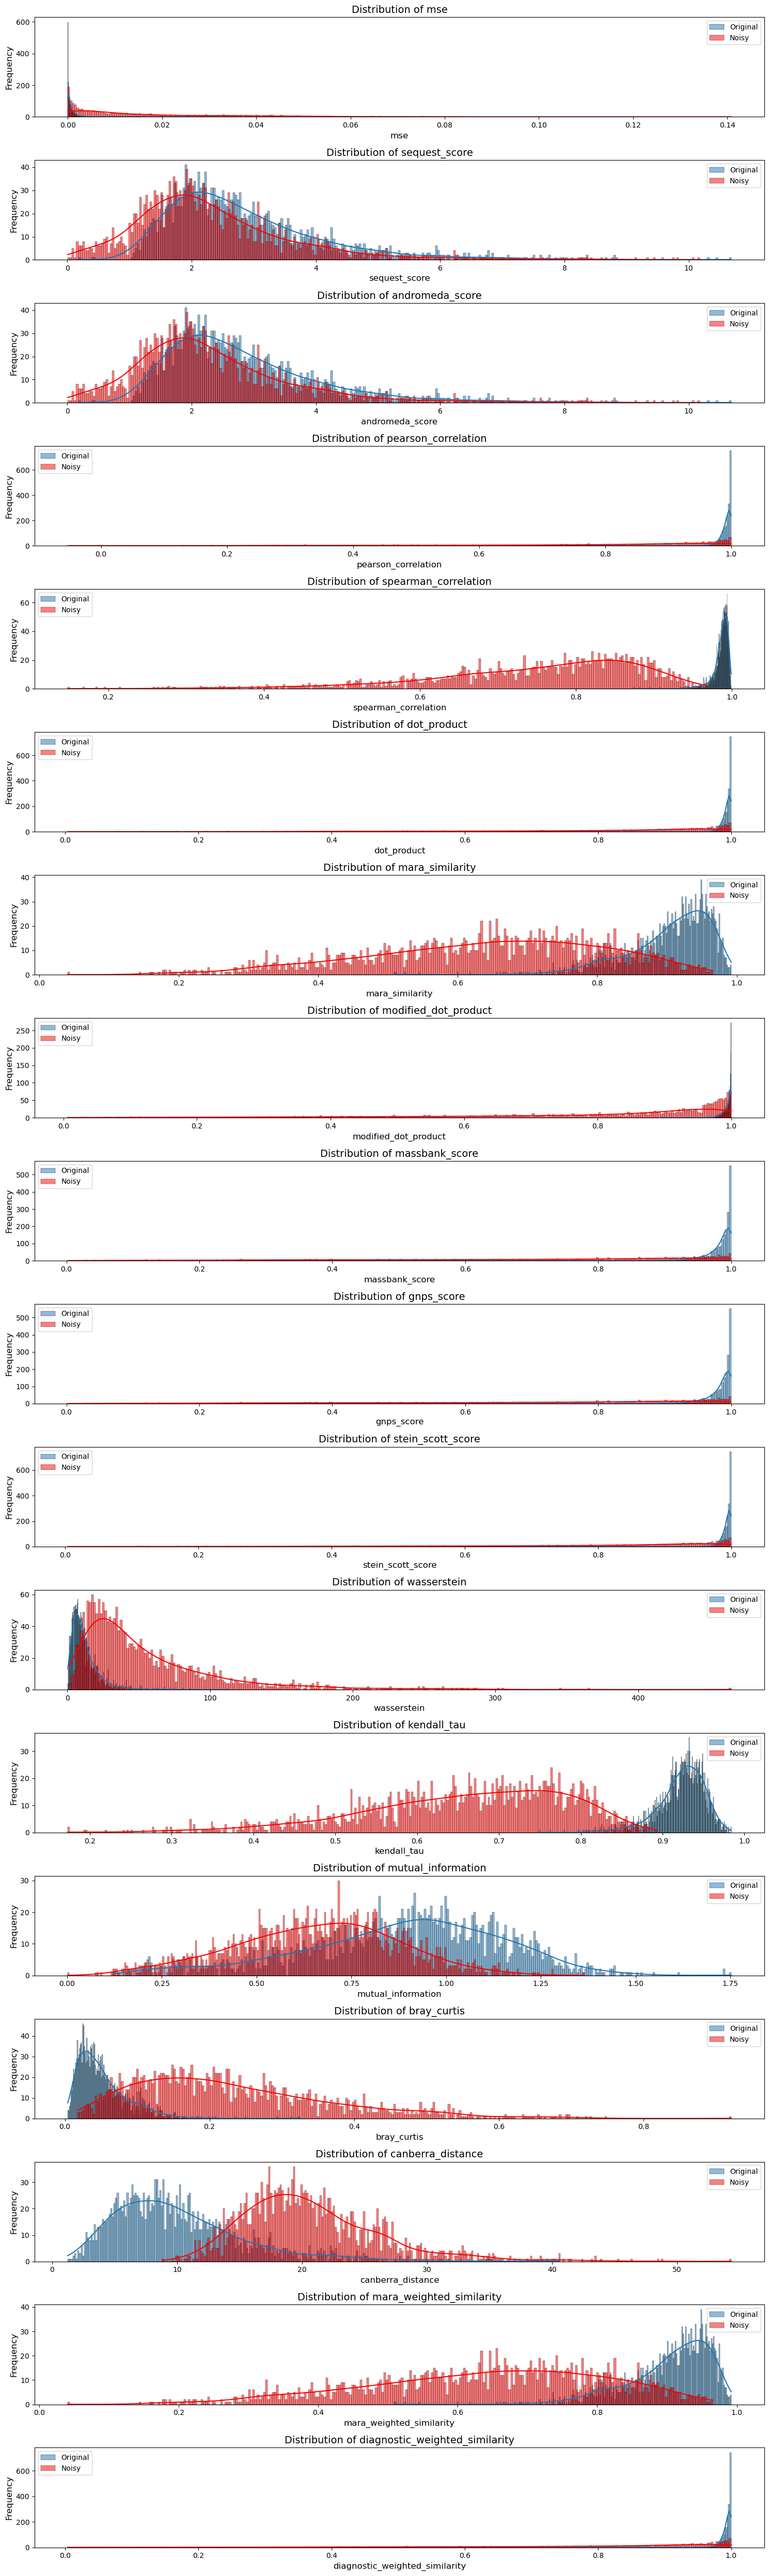

In [14]:
# Generate the distributions for each score as histograms
score_columns = score_df.columns

# Set plot size and style
plt.figure(figsize=(15, 50))
for idx, col in enumerate(score_columns, 1):
    plt.subplot(len(score_columns), 1, idx)
    sns.histplot(score_df[col], bins=300, kde=True, label="Original")
    sns.histplot(
        score_df_randomized_swap[col], bins=300, kde=True, color="red", label="Noisy"
    )
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.legend()
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

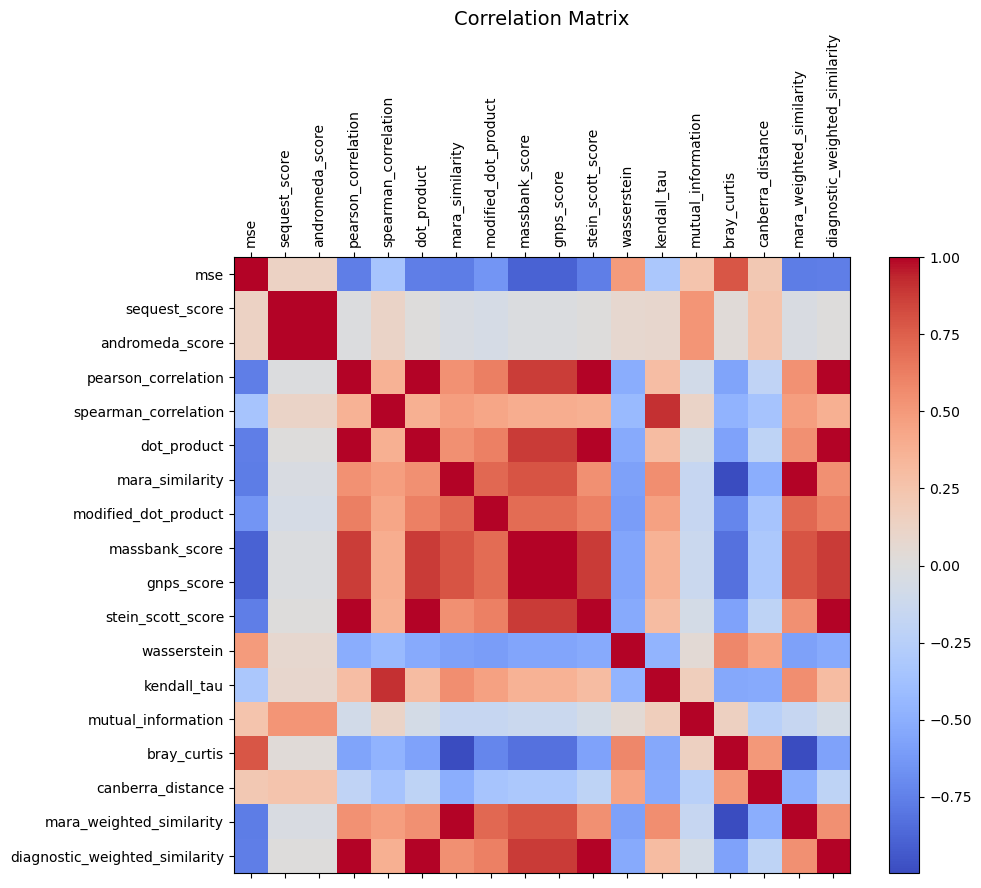

In [65]:
corr_matrix = score_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap="coolwarm")

fig.colorbar(cax)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Matrix", fontsize=14)
plt.show()

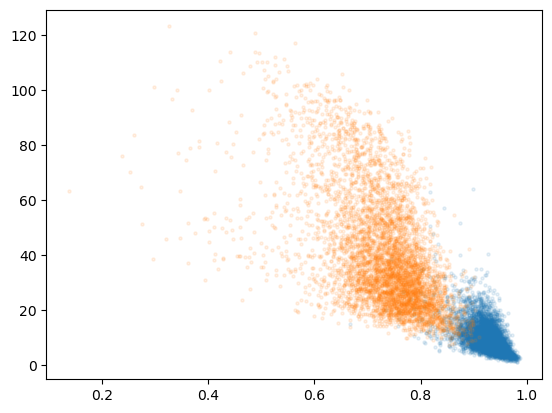

In [66]:
plt.scatter(score_df["kendall_tau"], score_df["canberra_distance"],s=5,alpha=0.1)
plt.scatter(
    score_df_randomized["kendall_tau"],
    score_df_randomized["canberra_distance"],
    s=5,
    alpha=0.1,
)